In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WB_WDI_SH_H2O_SMDW_UR_ZS.csv')

In [3]:
df.head()

,STRUCTURE,STRUCTURE_ID,ACTION,FREQ_ID,FREQ_NAME,REF_AREA_ID,REF_AREA_NAME,INDICATOR_ID,INDICATOR_NAME,SEX_ID,...,DATA_SOURCE_NAME,UNIT_TYPE_ID,UNIT_TYPE_NAME,TIME_FORMAT_ID,TIME_FORMAT_NAME,COMMENT_OBS,OBS_STATUS_ID,OBS_STATUS_NAME,OBS_CONF_ID,OBS_CONF_NAME
0,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,AFE,Africa Eastern and Southern,WB_WDI_SH_H2O_SMDW_UR_ZS,People using safely managed drinking water ser...,_T,...,World Development Indicators (WDI),RATIO,Ratio,P1Y,Annual,NaN,A,Normal value,PU,Public
1,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,AFW,Africa Western and Central,WB_WDI_SH_H2O_SMDW_UR_ZS,People using safely managed drinking water ser...,_T,...,World Development Indicators (WDI),RATIO,Ratio,P1Y,Annual,NaN,A,Normal value,PU,Public
2,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,EAS,East Asia & Pacific,WB_WDI_SH_H2O_SMDW_UR_ZS,People using safely managed drinking water ser...,_T,...,World Development Indicators (WDI),RATIO,Ratio,P1Y,Annual,NaN,A,Normal value,PU,Public
3,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,EAP,East Asia & Pacific (excluding high income),WB_WDI_SH_H2O_SMDW_UR_ZS,People using safely managed drinking water ser...,_T,...,World Development Indicators (WDI),RATIO,Ratio,P1Y,Annual,NaN,A,Normal value,PU,Public
4,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,TEA,East Asia & Pacific (IDA & IBRD),WB_WDI_SH_H2O_SMDW_UR_ZS,People using safely managed drinking water ser...,_T,...,World Development Indicators (WDI),RATIO,Ratio,P1Y,Annual,NaN,A,Normal value,PU,Public


In [4]:
print(df.columns)


Index(['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ_ID', 'FREQ_NAME',
       'REF_AREA_ID', 'REF_AREA_NAME', 'INDICATOR_ID', 'INDICATOR_NAME',
       'SEX_ID', 'SEX_NAME', 'AGE_ID', 'AGE_NAME', 'URBANISATION_ID',
       'URBANISATION_NAME', 'UNIT_MEASURE_ID', 'UNIT_MEASURE_NAME',
       'COMP_BREAKDOWN_1_ID', 'COMP_BREAKDOWN_1_NAME', 'COMP_BREAKDOWN_2_ID',
       'COMP_BREAKDOWN_2_NAME', 'COMP_BREAKDOWN_3_ID', 'COMP_BREAKDOWN_3_NAME',
       'TIME_PERIOD', 'OBS_VALUE', 'AGG_METHOD_ID', 'AGG_METHOD_NAME',
       'DECIMALS_ID', 'DECIMALS_NAME', 'DATABASE_ID_ID', 'DATABASE_ID_NAME',
       'COMMENT_TS', 'UNIT_MULT_ID', 'UNIT_MULT_NAME', 'DATA_SOURCE_ID',
       'DATA_SOURCE_NAME', 'UNIT_TYPE_ID', 'UNIT_TYPE_NAME', 'TIME_FORMAT_ID',
       'TIME_FORMAT_NAME', 'COMMENT_OBS', 'OBS_STATUS_ID', 'OBS_STATUS_NAME',
       'OBS_CONF_ID', 'OBS_CONF_NAME'],
      dtype='object')


In [6]:
# Filter hanya tahun 2022
df_2022 = df[df['TIME_PERIOD'] == 2022]

# Hapus nilai kosong
df_2022 = df_2022.dropna(subset=['OBS_VALUE'])

# Ambil 10 negara dengan nilai tertinggi
top10 = df_2022.sort_values(by='OBS_VALUE', ascending=False).head(10)

# Tampilkan
print(top10[['REF_AREA_NAME', 'OBS_VALUE']])

             REF_AREA_NAME   OBS_VALUE
2731               Hungary  100.000000
2747                Monaco  100.000000
2738                Kuwait  100.000000
2730  Hong Kong SAR, China  100.000000
2726             Gibraltar  100.000000
2721                France  100.000000
2768             Singapore  100.000000
2744      Macao SAR, China  100.000000
2724               Germany   99.996237
2743            Luxembourg   99.800000


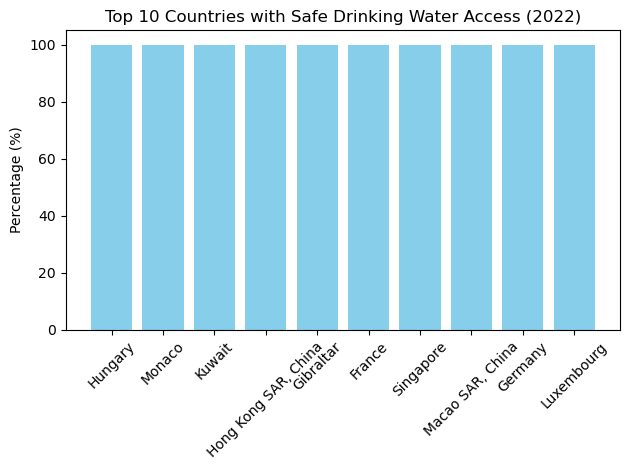

In [101]:
plt.bar(top10['REF_AREA_NAME'], top10['OBS_VALUE'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Countries with Safe Drinking Water Access (2022)')
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.show()




<Figure size 640x480 with 0 Axes>

In [8]:
# Bersihkan nama kolom dari spasi
df.columns = df.columns.str.strip()

# Filter data untuk satu negara, misalnya Indonesia
negara = 'Indonesia'  # kamu bisa ganti jadi negara lain
df_negara = df[df['REF_AREA_NAME'] == negara]

# Filter tahun antara 2000–2022
df_negara = df_negara[(df_negara['TIME_PERIOD'] >= 2000) & (df_negara['TIME_PERIOD'] <= 2022)]

# Buang baris tanpa nilai
df_negara = df_negara.dropna(subset=['OBS_VALUE'])

# Sortir berdasarkan tahun (agar grafiknya urut)
df_negara = df_negara.sort_values(by='TIME_PERIOD')

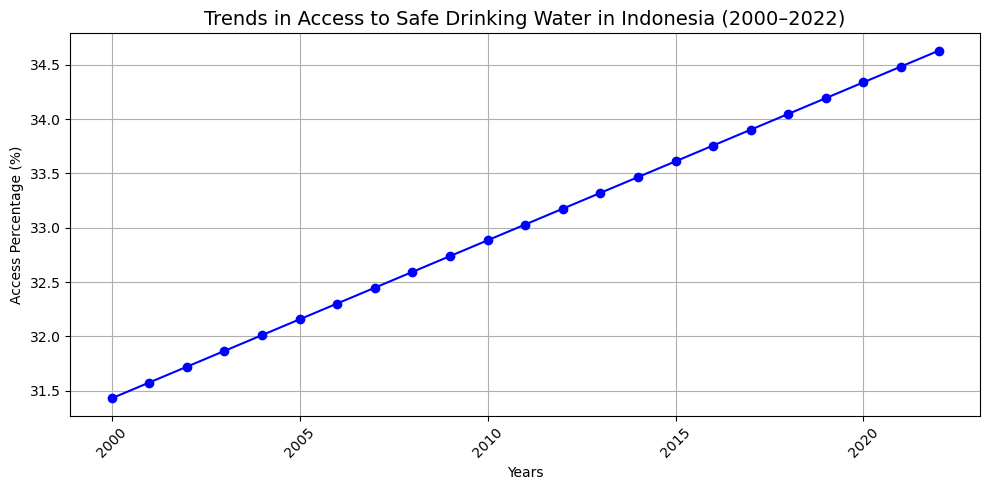

In [103]:
# Plot grafik tren
plt.figure(figsize=(10, 5))
plt.plot(df_negara['TIME_PERIOD'], df_negara['OBS_VALUE'], marker='o', linestyle='-', color='blue')

plt.title(f'Trends in Access to Safe Drinking Water in {negara} (2000–2022)', fontsize=14)
plt.xlabel('Years')
plt.ylabel('Access Percentage (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
import plotly.express as px

In [12]:
tahun = 2022
df_2022 = df[df['TIME_PERIOD'] == tahun].copy()

In [13]:
df_2022 = df_2022.dropna(subset=['OBS_VALUE'])

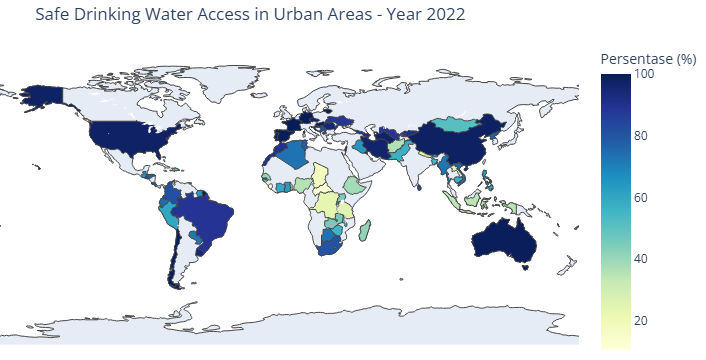

In [104]:
fig = px.choropleth(
    df_2022,
    locations='REF_AREA_NAME',  # nama negara
    locationmode='country names',
    color='OBS_VALUE',
    color_continuous_scale='YlGnBu',
    title=f'Safe Drinking Water Access in Urban Areas - Year {tahun}',
    labels={'OBS_VALUE': 'Persentase (%)'})
fig.update_geos(showframe=False, showcoastlines=True)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

In [30]:
# Filter data indikator dan tahun
df_2022 = df[
    (df['TIME_PERIOD'] == 2022) &
    (df['INDICATOR_ID'] == 'WB_WDI_SH_H2O_SMDW_UR_ZS')
].copy()

In [25]:
df_2022 = df_2022.dropna(subset=['OBS_VALUE'])

In [31]:
top10 = df_2022.sort_values(by='OBS_VALUE', ascending=False).head(10)
bottom10 = df_2022.sort_values(by='OBS_VALUE', ascending=True).head(10)

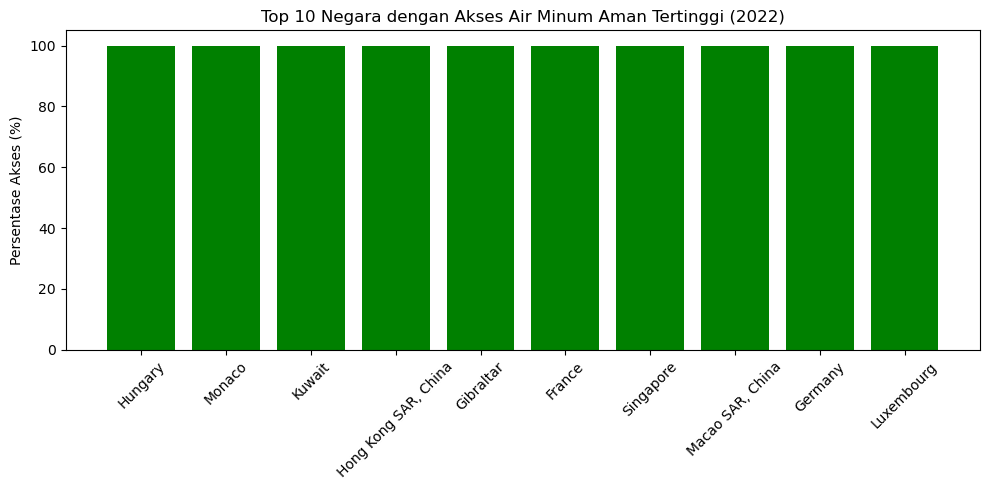

In [32]:
plt.figure(figsize=(10, 5))
plt.bar(top10['REF_AREA_NAME'], top10['OBS_VALUE'], color='green')
plt.title('Top 10 Negara dengan Akses Air Minum Aman Tertinggi (2022)')
plt.ylabel('Persentase Akses (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

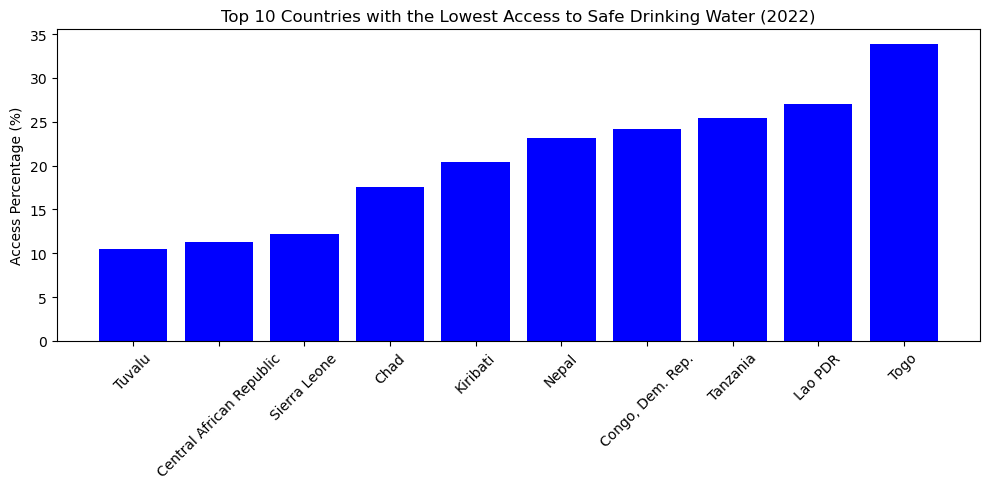

In [105]:
plt.figure(figsize=(10, 5))
plt.bar(bottom10['REF_AREA_NAME'], bottom10['OBS_VALUE'], color='blue')
plt.title('Top 10 Countries with the Lowest Access to Safe Drinking Water (2022)')
plt.ylabel('Access Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
df['INDICATOR_ID'].unique()


array(['WB_WDI_SH_H2O_SMDW_UR_ZS'], dtype=object)

In [34]:
indo = df[(df['REF_AREA_NAME'] == 'Indonesia') & 
          (df['INDICATOR_ID'] == 'WB_WDI_SH_H2O_SMDW_UR_ZS')]

# Sort berdasarkan tahun
indo = indo.sort_values(by='TIME_PERIOD')

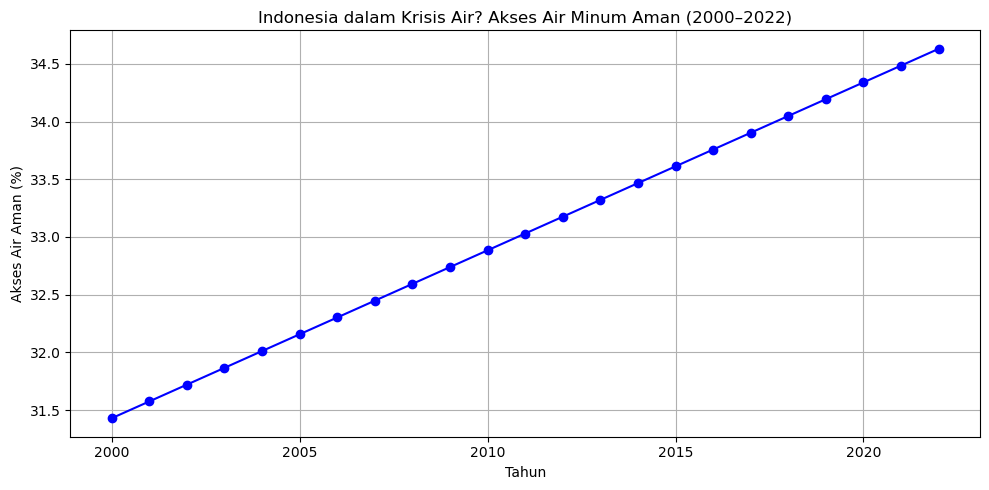

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(indo['TIME_PERIOD'], indo['OBS_VALUE'], marker='o', color='blue')
plt.title('Indonesia dalam Krisis Air? Akses Air Minum Aman (2000–2022)')
plt.xlabel('Tahun')
plt.ylabel('Akses Air Aman (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
import scipy.stats as stats

In [37]:
df2 = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_122367.csv')

In [38]:
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27458.225330,27441.529660,28440.051960,30082.127640,31096.205070,22855.932320,27200.061080,30559.533530,33984.790620,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.121835,186.941781,197.402402,225.440494,208.999748,226.876513,...,1479.615260,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1568.159891,1673.841139
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.939925,127.454189,133.827044,139.008291,148.549379,155.565216,...,1860.727694,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3213.902611,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690


In [41]:
df2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')

In [42]:
print(df2.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')


In [43]:
df2.columns = df2.columns.str.strip()

In [44]:
gdp_2022 = df2[['Country Name', '2022']].copy()
gdp_2022.columns = ['Country', 'GDP_PER_CAPITA']
gdp_2022 = gdp_2022.dropna()

In [45]:
akses_air = df[
    (df['TIME_PERIOD'] == 2022) & 
    (df['INDICATOR_ID'] == 'WB_WDI_SH_H2O_SMDW_UR_ZS')
].copy()

akses_air = akses_air[['REF_AREA_NAME', 'OBS_VALUE']]
akses_air.columns = ['Country', 'ACCESS_WATER']
akses_air = akses_air.dropna()


In [46]:
# Gabung berdasarkan nama negara
merged = pd.merge(akses_air, gdp_2022, on='Country')


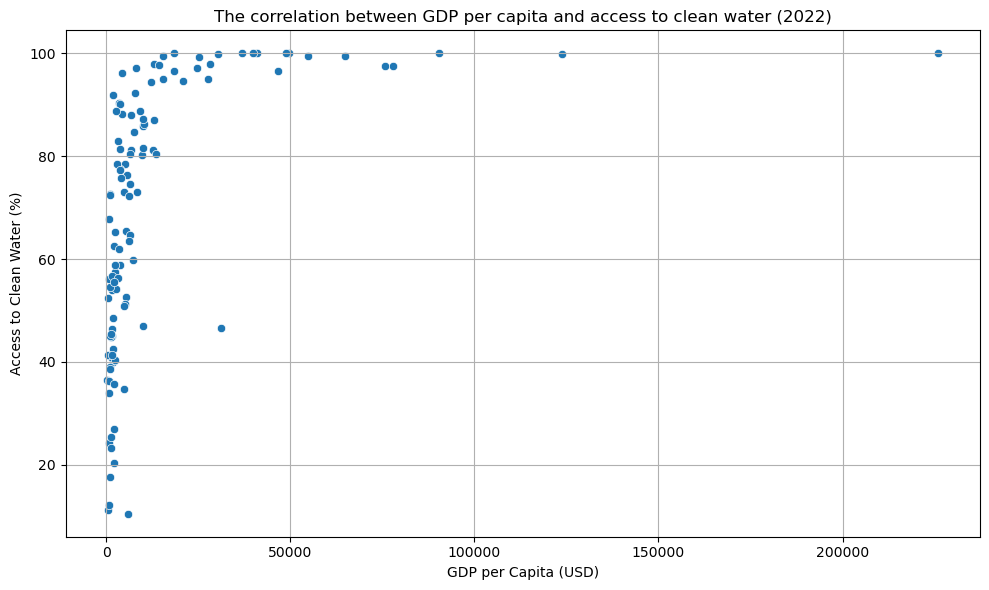

Korelasi Pearson: 0.46 | p-value: 0.0000


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='GDP_PER_CAPITA', y='ACCESS_WATER', data=merged)
plt.title('The correlation between GDP per capita and access to clean water (2022)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Access to Clean Water (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Korelasi Pearson
corr, p_value = pearsonr(merged['GDP_PER_CAPITA'], merged['ACCESS_WATER'])
print(f'Korelasi Pearson: {corr:.2f} | p-value: {p_value:.4f}')


In [56]:
import pandas as pd

df3 = pd.read_csv('sanitasi.csv', skiprows=3)




In [57]:
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,People using safely managed sanitation service...,SH.STA.SMSS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,People using safely managed sanitation service...,SH.STA.SMSS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,People using safely managed sanitation service...,SH.STA.SMSS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,People using safely managed sanitation service...,SH.STA.SMSS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,People using safely managed sanitation service...,SH.STA.SMSS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')

In [64]:
df3.columns = df3.columns.str.strip()  # Bersihkan nama kolom

# Ambil data sanitasi tahun 2022
df_sanitasi = df3[['Country Name', '2022']].dropna()
df_sanitasi.columns = ['Country', 'SANITATION']
df_sanitasi = df_sanitasi.dropna()


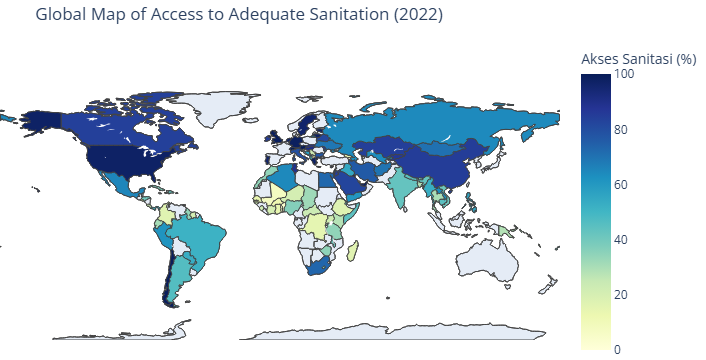

In [111]:
import plotly.express as px

# Pastikan df_sanitasi sudah siap
fig = px.choropleth(
    df_sanitasi,
    locations='Country',
    locationmode='country names',
    color='SANITATION',
    color_continuous_scale='YlGnBu',
    title='Global Map of Access to Adequate Sanitation (2022)',
    labels={'SANITATION': 'Akses Sanitasi (%)'},
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_geos(showframe=False, showcoastlines=True)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


In [59]:
df_all = akses_air.merge(gdp_2022, on='Country', how='inner')
df_all = df_all.merge(df_sanitasi, on='Country', how='inner')


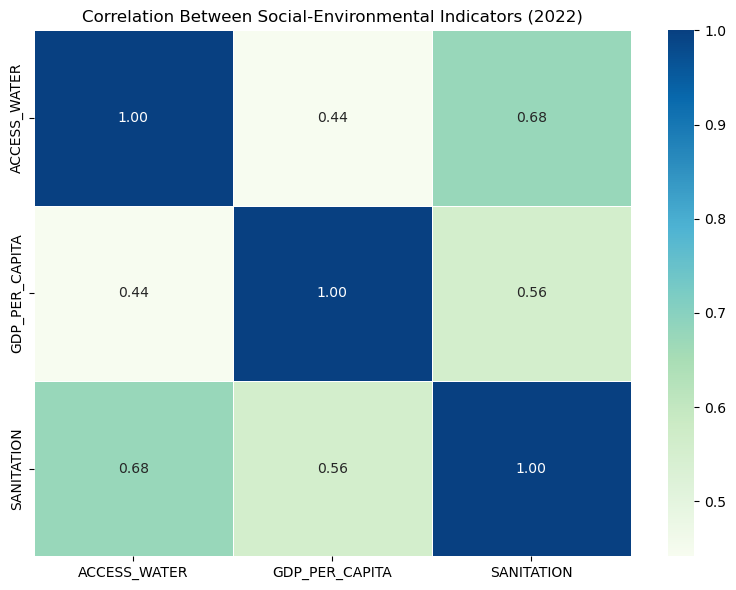

In [107]:
corr_matrix = df_all.drop('Country', axis=1).corr()

# Plot Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='GnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Social-Environmental Indicators (2022)')
plt.tight_layout()
plt.show()

In [65]:
df_sanitasi.head()

,Country,SANITATION
5,Albania,49.646056
6,Andorra,100.000000
8,United Arab Emirates,98.455265
9,Argentina,46.211244
10,Armenia,0.000000


In [69]:
# Ambil data air bersih tahun 2022
df_air = df[df['TIME_PERIOD'] == 2022][['REF_AREA_NAME', 'OBS_VALUE']].copy()


# Ubah nama kolom
df_air.columns = ['Country', 'ACCESS_WATER']

# Hapus nilai kosong
df_air = df_air.dropna()

# Pastikan nilainya numerik
df_air['ACCESS_WATER'] = pd.to_numeric(df_air['ACCESS_WATER'], errors='coerce')

# Cek hasil
print(df_air.head())


                                          Country  ACCESS_WATER
2672                  Africa Eastern and Southern     45.049448
2673                   Africa Western and Central     39.976112
2674                          East Asia & Pacific     87.040858
2675  East Asia & Pacific (excluding high income)     85.887844
2676             East Asia & Pacific (IDA & IBRD)     86.013289


In [70]:
df_combined = pd.merge(df_air, df_sanitasi, on='Country', how='inner')


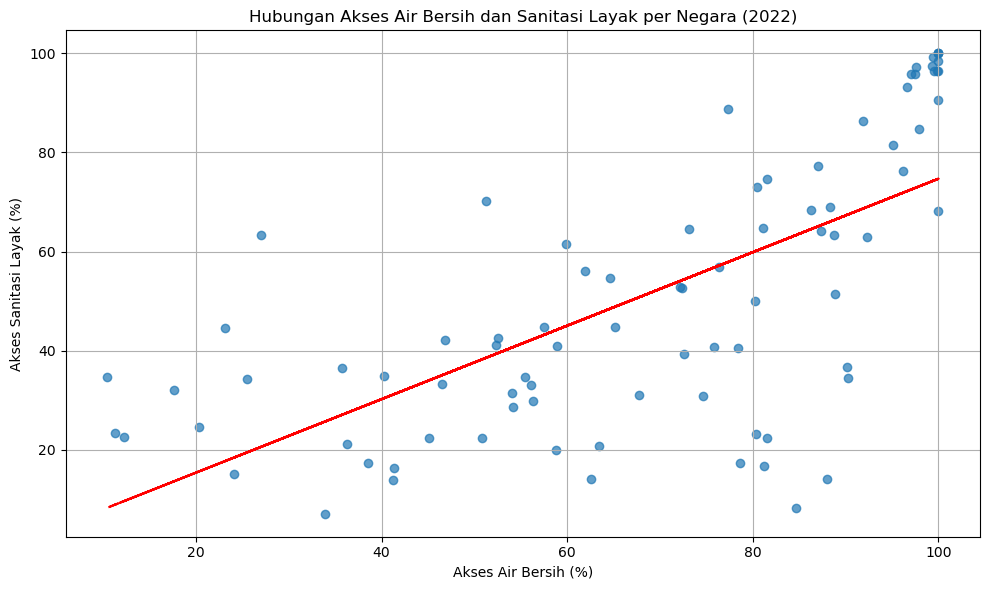

In [71]:
plt.figure(figsize=(10, 6))

# Titik per negara
plt.scatter(df_combined['ACCESS_WATER'], df_combined['SANITATION'], alpha=0.7)

# Tambahkan garis tren (regresi linear)
z = np.polyfit(df_combined['ACCESS_WATER'], df_combined['SANITATION'], 1)
p = np.poly1d(z)
plt.plot(df_combined['ACCESS_WATER'], p(df_combined['ACCESS_WATER']), color='red', linestyle='--')

# Label dan tampilan
plt.title('Hubungan Akses Air Bersih dan Sanitasi Layak per Negara (2022)')
plt.xlabel('Akses Air Bersih (%)')
plt.ylabel('Akses Sanitasi Layak (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
df.columns

Index(['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ_ID', 'FREQ_NAME',
       'REF_AREA_ID', 'REF_AREA_NAME', 'INDICATOR_ID', 'INDICATOR_NAME',
       'SEX_ID', 'SEX_NAME', 'AGE_ID', 'AGE_NAME', 'URBANISATION_ID',
       'URBANISATION_NAME', 'UNIT_MEASURE_ID', 'UNIT_MEASURE_NAME',
       'COMP_BREAKDOWN_1_ID', 'COMP_BREAKDOWN_1_NAME', 'COMP_BREAKDOWN_2_ID',
       'COMP_BREAKDOWN_2_NAME', 'COMP_BREAKDOWN_3_ID', 'COMP_BREAKDOWN_3_NAME',
       'TIME_PERIOD', 'OBS_VALUE', 'AGG_METHOD_ID', 'AGG_METHOD_NAME',
       'DECIMALS_ID', 'DECIMALS_NAME', 'DATABASE_ID_ID', 'DATABASE_ID_NAME',
       'COMMENT_TS', 'UNIT_MULT_ID', 'UNIT_MULT_NAME', 'DATA_SOURCE_ID',
       'DATA_SOURCE_NAME', 'UNIT_TYPE_ID', 'UNIT_TYPE_NAME', 'TIME_FORMAT_ID',
       'TIME_FORMAT_NAME', 'COMMENT_OBS', 'OBS_STATUS_ID', 'OBS_STATUS_NAME',
       'OBS_CONF_ID', 'OBS_CONF_NAME'],
      dtype='object')

In [79]:
df2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')

In [80]:
df3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')

In [81]:
df['TIME_PERIOD']

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
2786    2022
2787    2022
2788    2022
2789    2022
2790    2022
Name: TIME_PERIOD, Length: 2791, dtype: int64

In [126]:
# data tahun 2022 
df_air_2022 = df2[['Country Name', 'Country Code', '2022']].copy()
df_air_2022.rename(columns={'2022': 'ACCESS_WATER'}, inplace=True)

df_sanitasi_2022 = df3[['Country Name', 'Country Code', '2022']].copy()
df_sanitasi_2022.rename(columns={'2022': 'SANITATION'}, inplace=True)

# Gabungkan berdasarkan Country Name dan Country Code
df_combined = pd.merge(df_air_2022, df_sanitasi_2022, on=['Country Name', 'Country Code'], how='inner')

# Drop yang datanya kosong
df_combined.dropna(inplace=True)


print(df_combined.head())


            Country Name Country Code  ACCESS_WATER  SANITATION
5                Albania          ALB   6846.426694   49.646056
6                Andorra          AND  42414.059010  100.000000
8   United Arab Emirates          ARE  49899.065300   98.455265
9              Argentina          ARG  13935.681110   46.211244
10               Armenia          ARM   6571.974455    0.000000


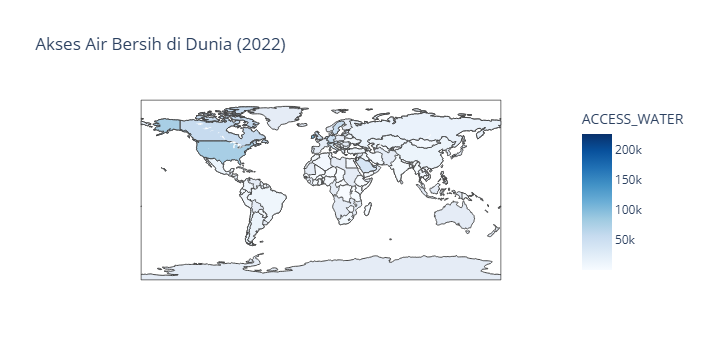

In [83]:
fig = px.choropleth(
    df_combined,
    locations='Country Code',
    color='ACCESS_WATER',
    hover_name='Country Name',
    title='Akses Air Bersih di Dunia (2022)',
    color_continuous_scale='Blues'
)
fig.show()


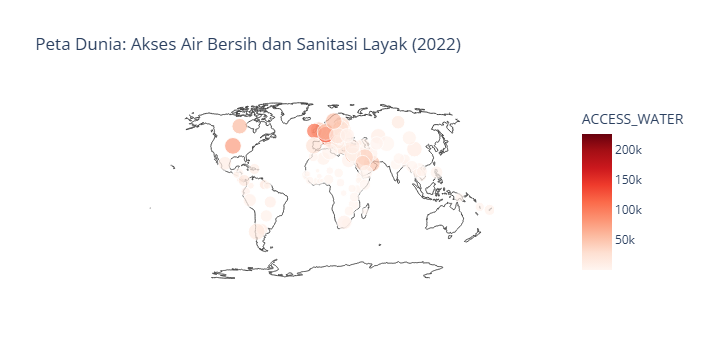

In [89]:
import plotly.express as px

fig = px.scatter_geo(
    df_combined,
    locations="Country Code",            # ISO country codes
    color="ACCESS_WATER",                # Warna titik: Akses air bersih
    size="SANITATION",                   # Ukuran titik: Akses sanitasi
    hover_name="Country Name",           # Info saat hover
    projection="natural earth",
    title="Peta Dunia: Akses Air Bersih dan Sanitasi Layak (2022)",
    color_continuous_scale="reds",      # Skema warna
    size_max=12                         # Batas maksimum ukuran titik
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    template="plotly_white"
)

fig.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3128\4050975136.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




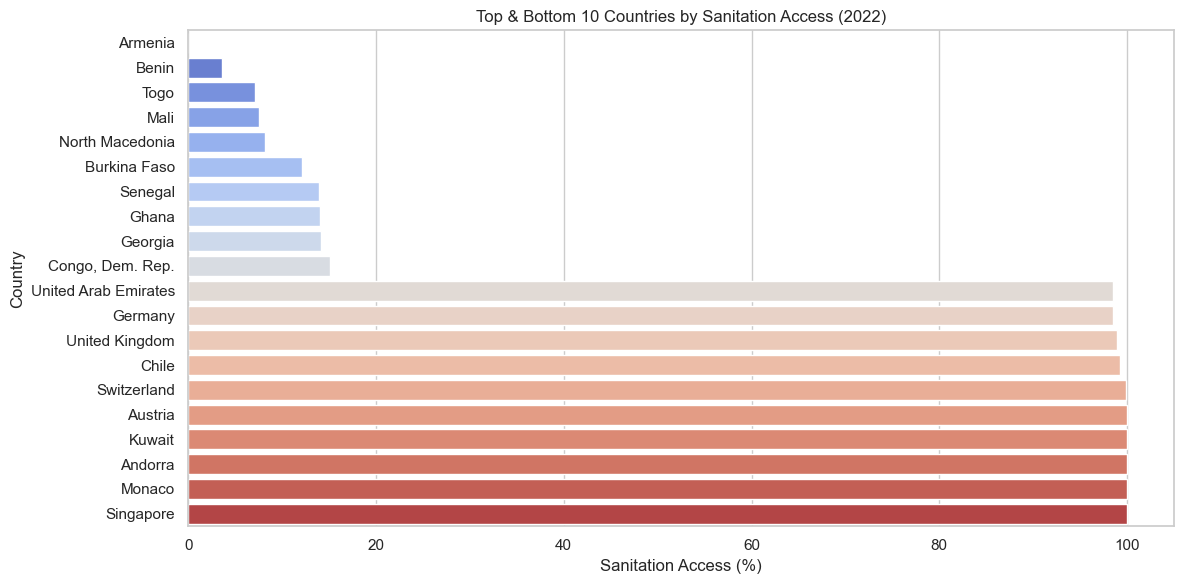

In [117]:
# Combine both and sort
combined_df = pd.concat([top10, bottom10])
combined_df = combined_df.sort_values(by='SANITATION', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=combined_df, x='SANITATION', y='Country', palette='coolwarm')
plt.title('Top & Bottom 10 Countries by Sanitation Access (2022)')
plt.xlabel('Sanitation Access (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [124]:

df_indonesia = df3[df3['Country Name'] == 'Indonesia'].copy()
df_indonesia.columns = df_indonesia.columns.str.strip()  # Bersihkan nama kolom


print(df_indonesia[[str(y) for y in range(2000, 2023)]])


     2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  ...  2013  \
106   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

     2014  2015  2016  2017  2018  2019  2020  2021  2022  
106   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[1 rows x 23 columns]


In [122]:

available = df3[['Country Name', '2022']].dropna()
print(available.head(10))


            Country Name        2022
5                Albania   49.646056
6                Andorra  100.000000
8   United Arab Emirates   98.455265
9              Argentina   46.211244
10               Armenia    0.000000
14               Austria   99.953368
15            Azerbaijan   62.980751
18                 Benin    3.635881
19          Burkina Faso   12.118249
20            Bangladesh   28.755079
